# Support Vector Regression

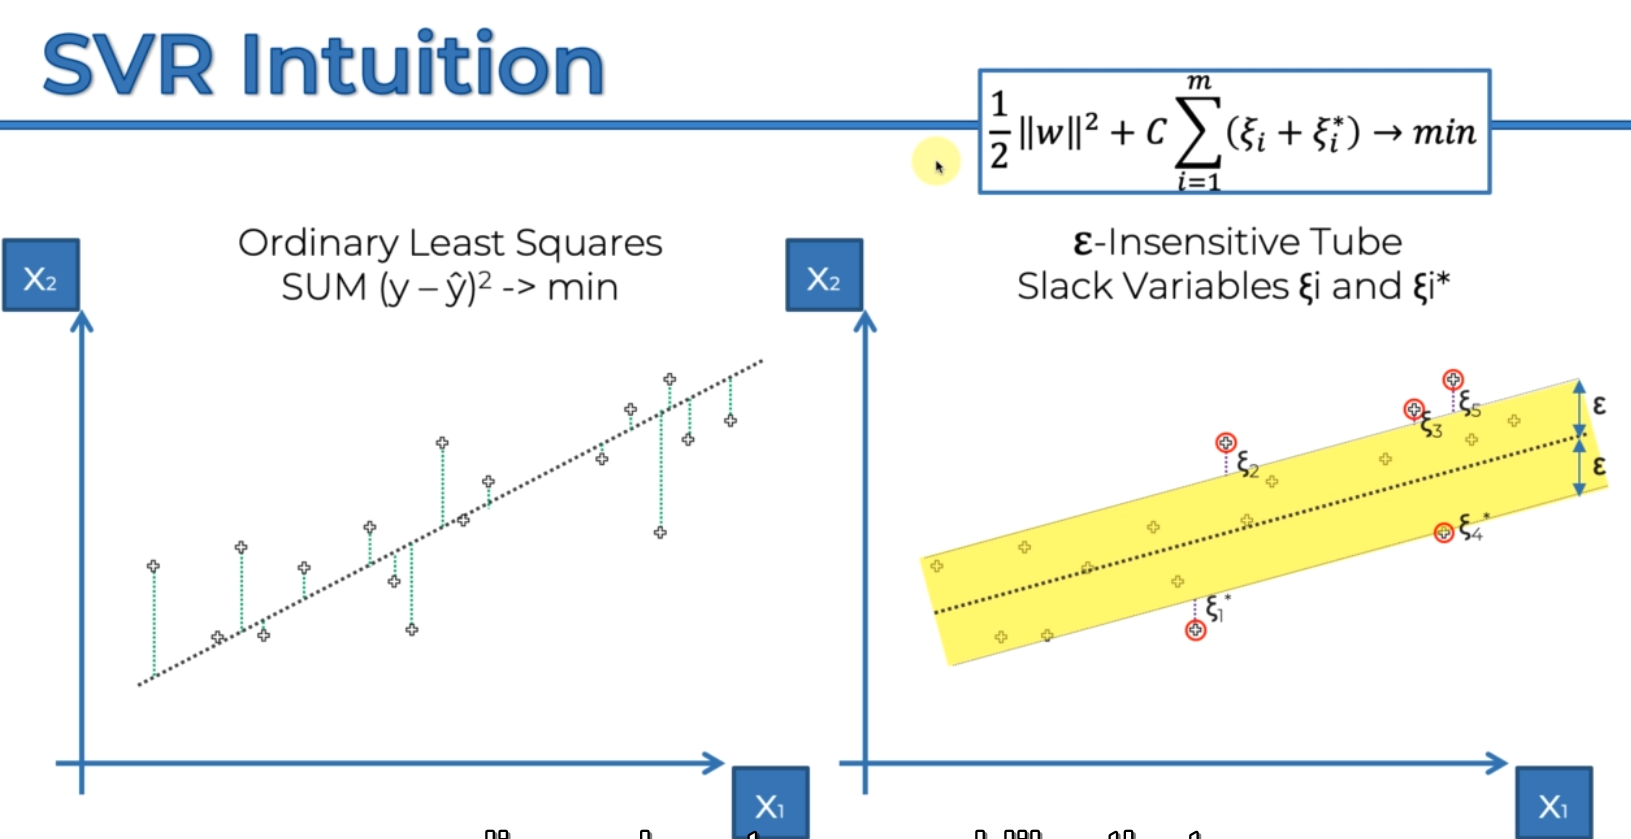

The plus-es in red are "support vectors" that help reduce error.
Any point outside the yellow sigma tube is a support vector that helps reduce error.

#### Note about non-linear support vector regression:
This will be covered in theoretical detail later in the course, for now we study the implementation for an application perspective. You will study about non-linear svr intuition in classification section, for now go ahead with the applications.

#### Typical imports, dataset import, and preprocessing

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

END = "\n-------------------------------------\n"

In [25]:
df = pd.read_csv('Position_Salaries.csv')
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

print(x, y)


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [26]:
# Feature scaling
# We don't want the model to neglect the features in x compared to the giant salary values. It won't work without the feature scaling because svr requires it so. Plus, SVR doesn't have built-in feature scaling as such.

# First, we reshape y to become a 2d array to display vertically, like x.
y = y.reshape(len(y), 1)

# For feature scaling, we don't use the same standard scaler objects for x and y. We need to avoid mean calculations to move across the columns. 
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

print(f"{x}{END}{y}")

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
-------------------------------------
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [27]:
# Now we train the model on the new scaled x and y
regressor = SVR(kernel='rbf') # rbf is a radial basis kernel that learns non-linear relationships for SVMs. This is most widely used.
regressor.fit(x, y)

c:\Users\hifia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [31]:
# Now we want to predict a new result outside of the existing ones.
regressor.predict(sc_x.transform([[6.5]]))

array([-0.27861589])

We can see that it is giving us an output for 6.5, which is weirdly scaled because it's not de-scaled. This means
that the model is not scaled properly. We need to inverse transform it to get the original value.

In [32]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1, 1))

array([[170370.0204065]])

Now our result is a lot more accurate. 

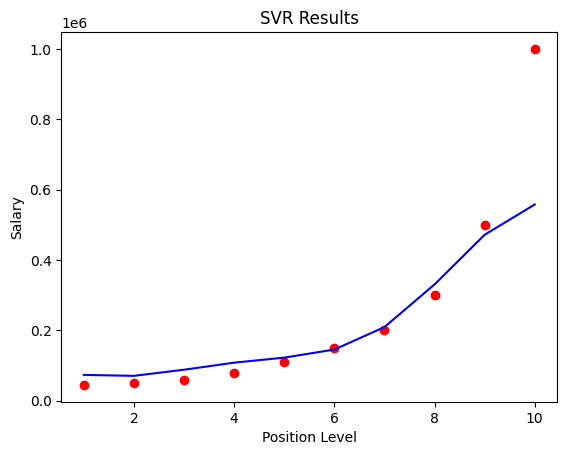

In [33]:
# Visualising SVR Results
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)), color='blue')
plt.title("SVR Results")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

C:\Users\hifia\AppData\Local\Temp\ipykernel_18884\1456925825.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x_inv), max(x_inv), 0.1)


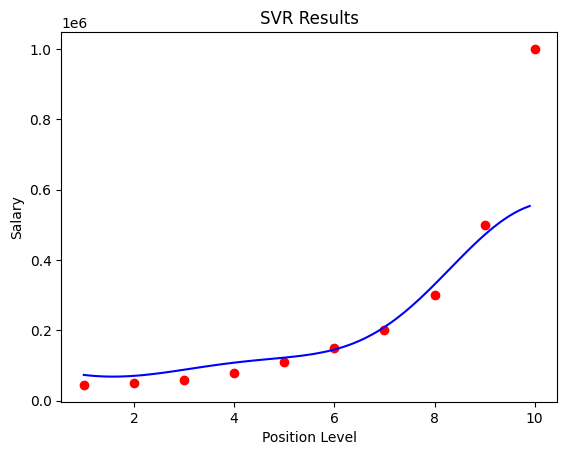

In [35]:
# In higher resolution
x_inv = sc_x.inverse_transform(x)
y_inv = sc_y.inverse_transform(y)

x_grid = np.arange(min(x_inv), max(x_inv), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_inv, y_inv, color='red')
plt.plot(x_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1,1)), color='blue')
plt.title("SVR Results")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()